In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


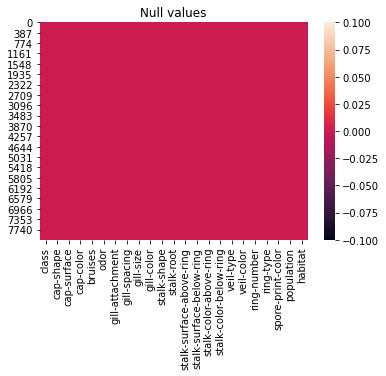

In [4]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
print('Number of edible mushrooms: ',df['class'].value_counts()[0])
print('Number of poisonous mushrooms: ',df['class'].value_counts()[1])
#Determining Unbalanced dataset vs balanced dataset

Number of edible mushrooms:  4208
Number of poisonous mushrooms:  3916


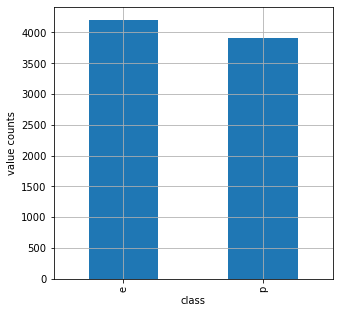

In [7]:
plt.figure(figsize=[5,5])
df['class'].value_counts().plot(kind='bar')
plt.xlabel("class")
plt.ylabel('value counts')
plt.grid()

In [8]:
dicty={}
for i in list(df.columns):
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto

In [9]:
for i in list(df.columns):
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [10]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [11]:
df.corr()['class']

class                       1.000000
cap-shape                  -0.112110
cap-surface                 0.169663
cap-color                  -0.042028
bruises                    -0.501530
odor                       -0.582015
gill-attachment             0.129200
gill-spacing                0.348387
gill-size                   0.540024
gill-color                 -0.412869
stalk-shape                 0.102019
stalk-root                 -0.337542
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
stalk-color-above-ring     -0.225294
stalk-color-below-ring     -0.098476
veil-type                        NaN
veil-color                  0.120766
ring-number                 0.152261
ring-type                  -0.556515
spore-print-color          -0.560715
population                 -0.155254
habitat                    -0.191297
Name: class, dtype: float64

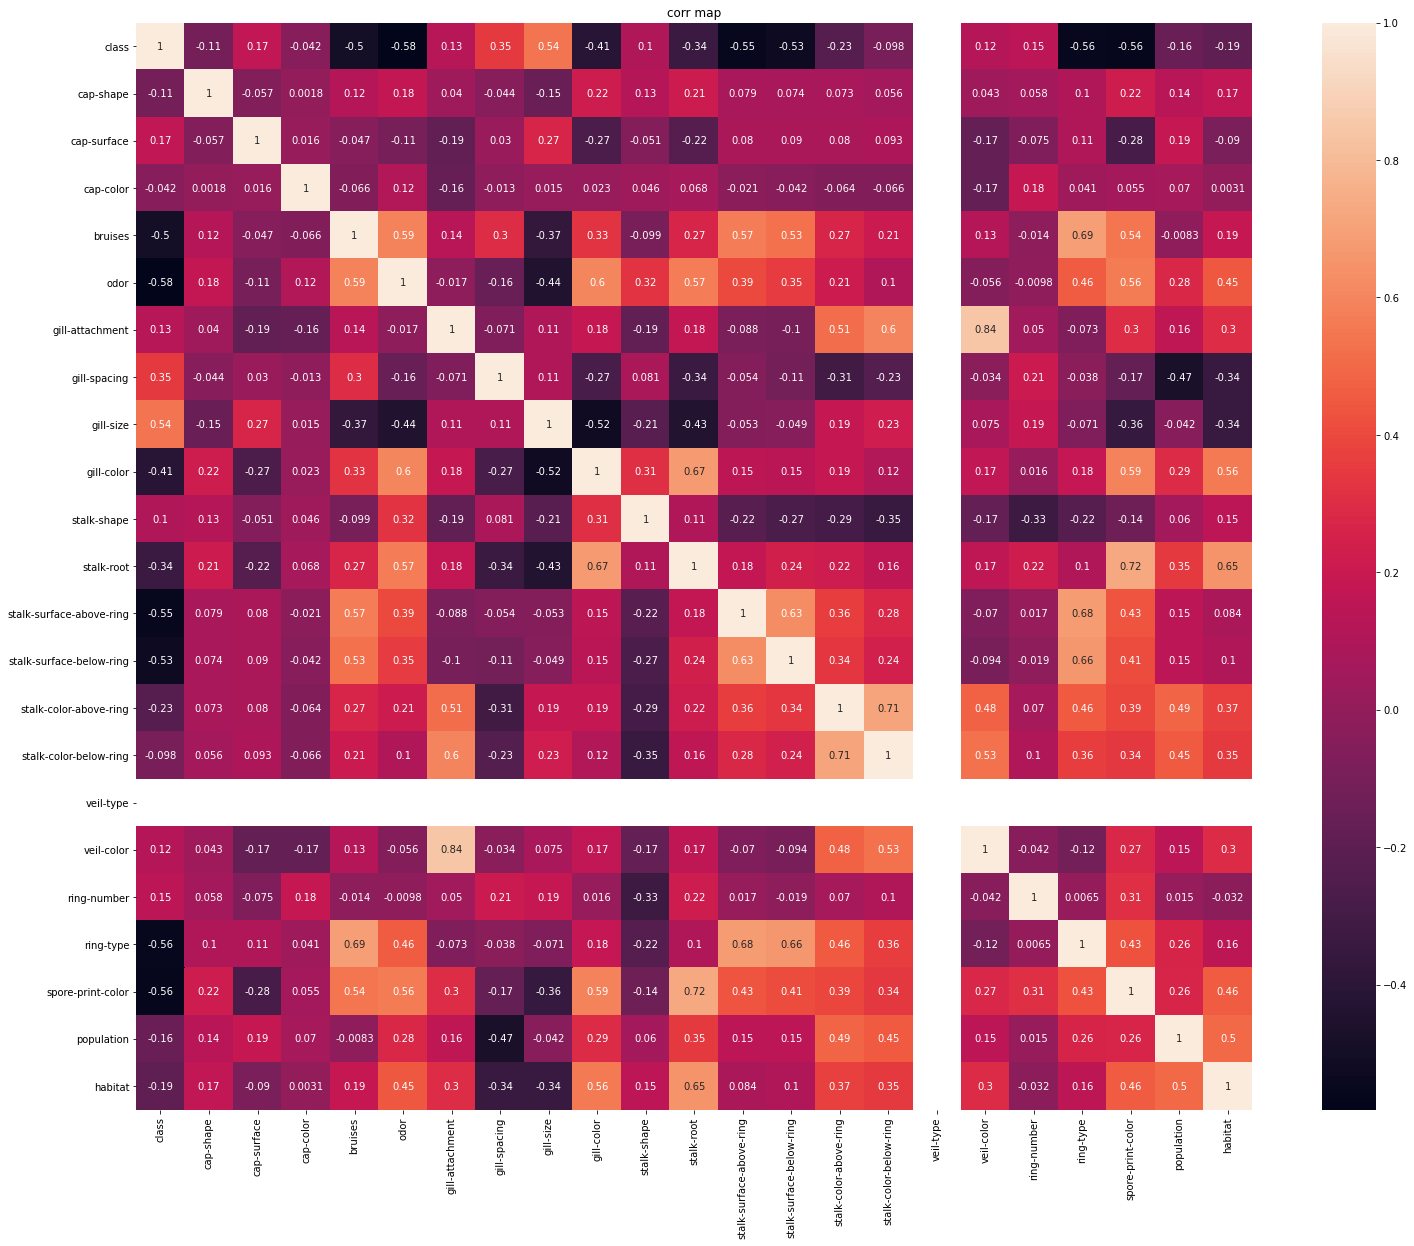

In [12]:
corr_mat=df.corr()
plt.figure(figsize=[25,20])
sns.heatmap(corr_mat,annot=True)
plt.title("corr map")
plt.show()

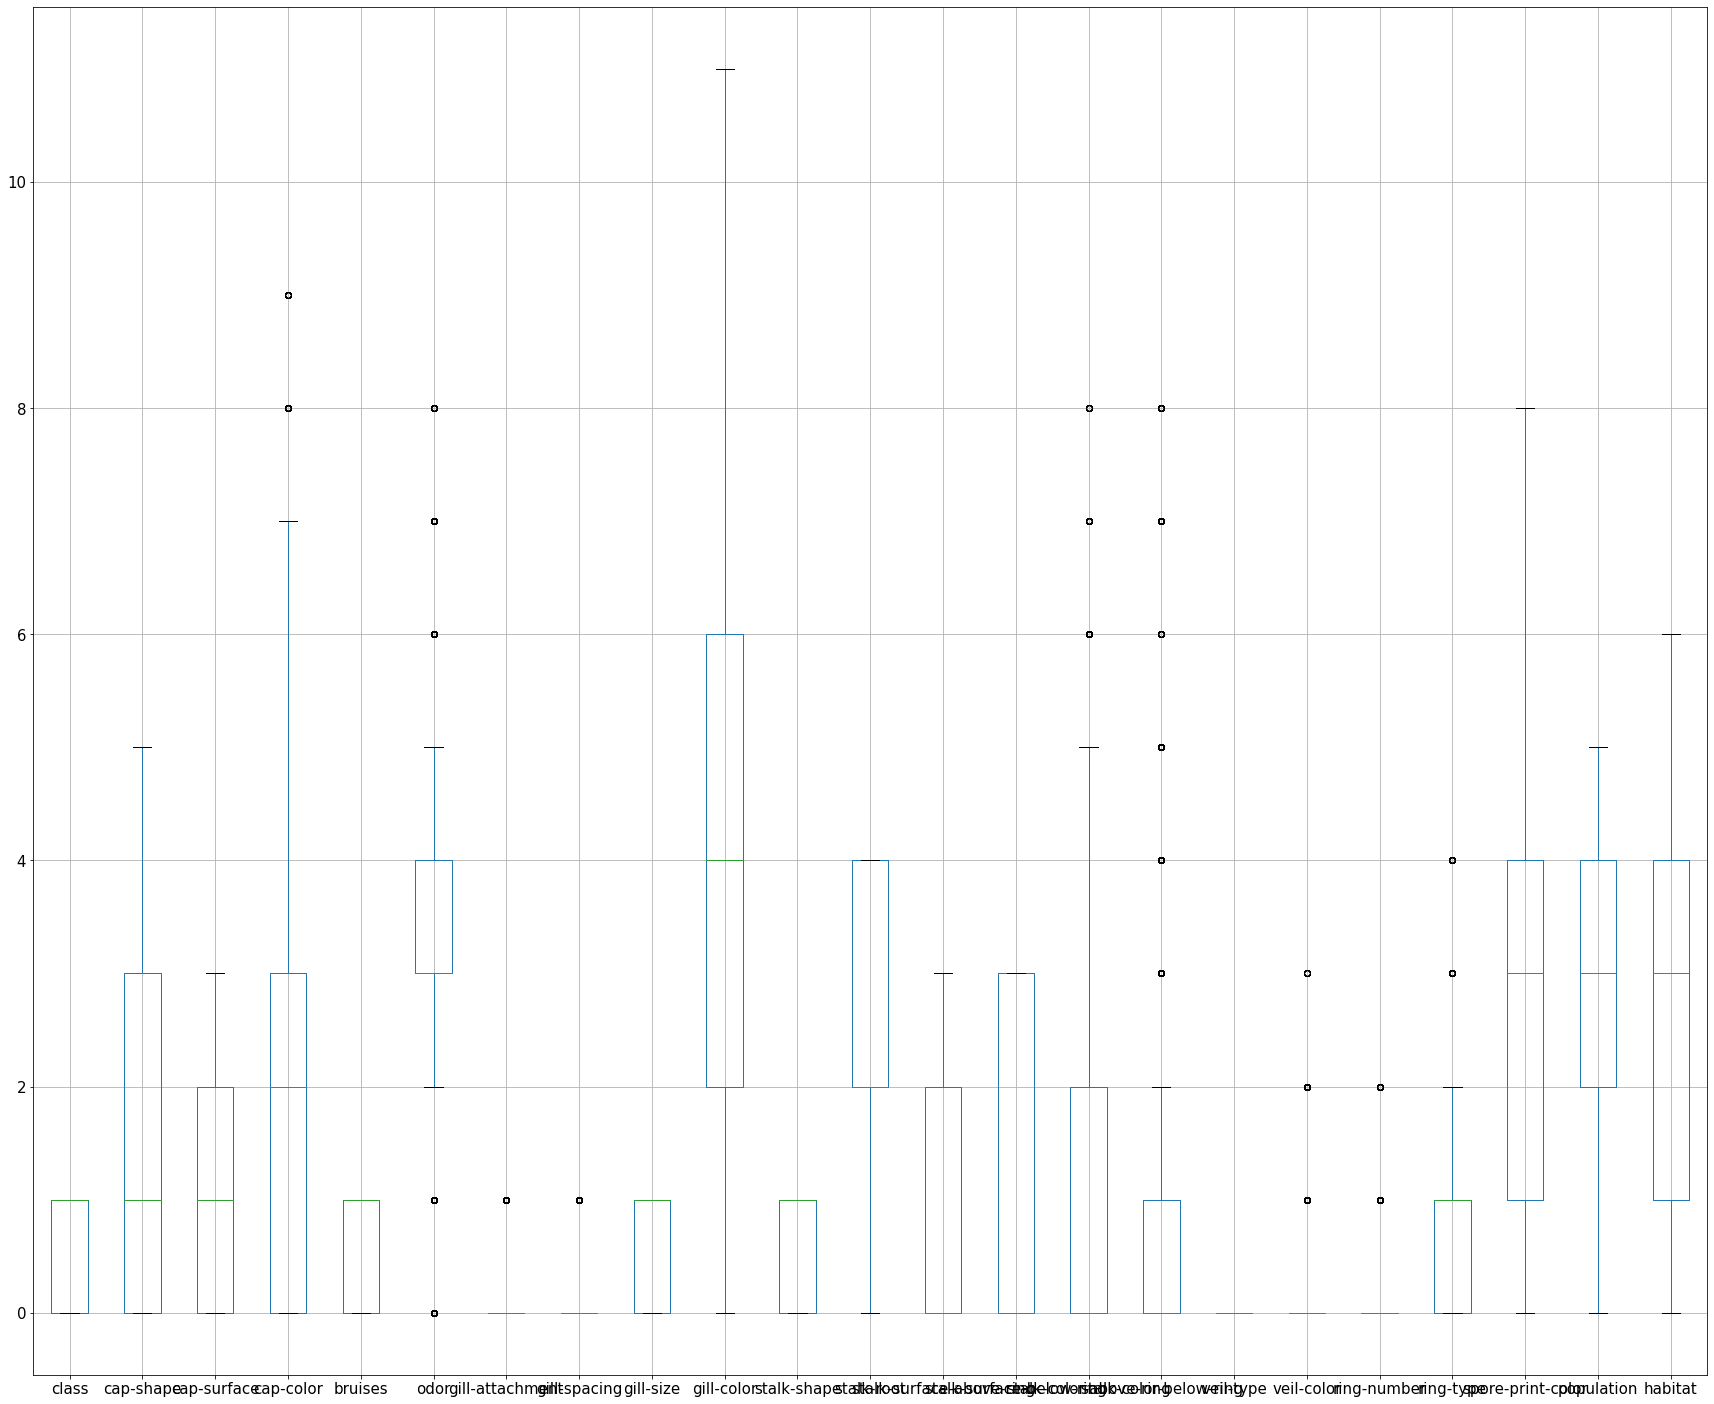

In [13]:
df.iloc[:,:].boxplot(figsize=[30,50],fontsize=15)
plt.subplots_adjust(bottom=0.5)
plt.show()

<AxesSubplot:>

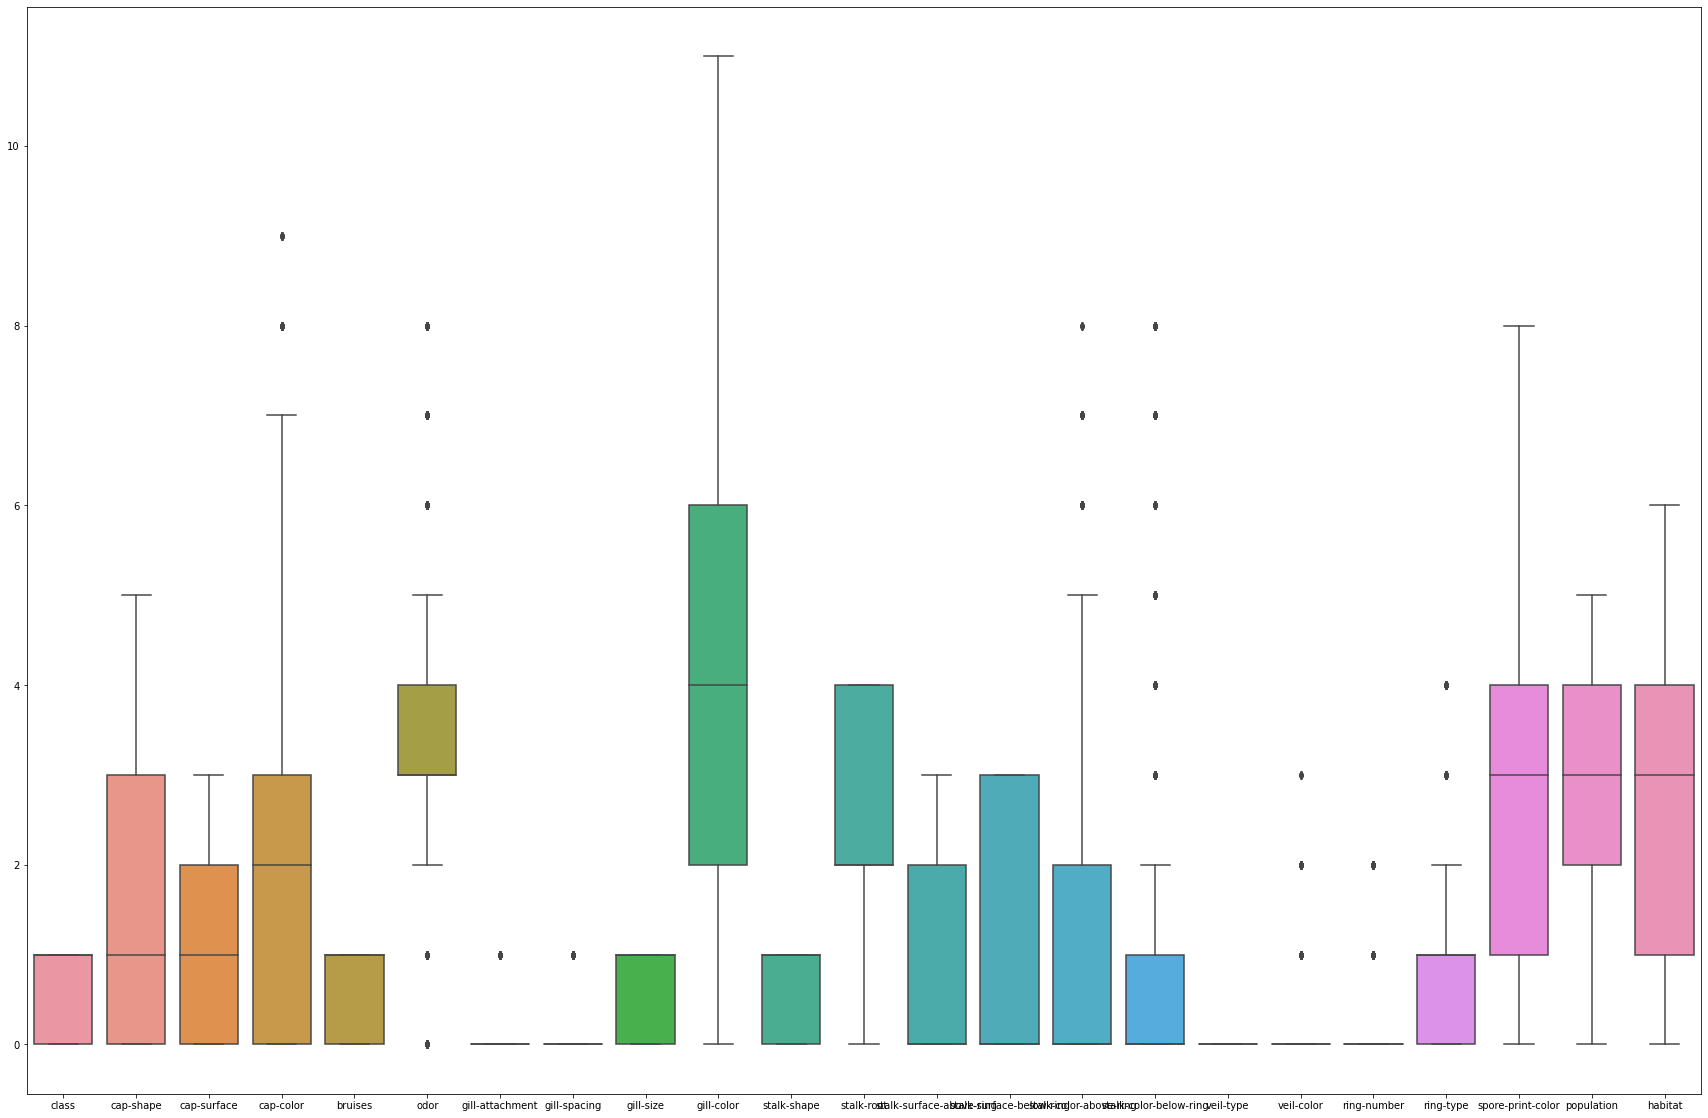

In [14]:
fig,ax=plt.subplots()
fig.set_size_inches(30,20)
sns.boxplot(ax=ax, data=df )

<AxesSubplot:xlabel='bruises'>

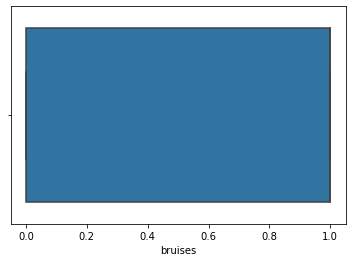

In [15]:
sns.boxplot(df['bruises'])

<AxesSubplot:xlabel='odor'>

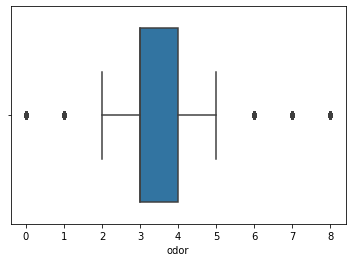

In [16]:
sns.boxplot(df['odor'])

<AxesSubplot:xlabel='gill-size'>

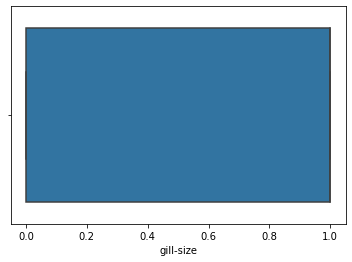

In [17]:
sns.boxplot(df['gill-size'])

<AxesSubplot:xlabel='stalk-surface-above-ring'>

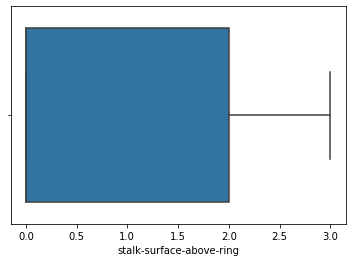

In [18]:
sns.boxplot(df['stalk-surface-above-ring'])

<AxesSubplot:xlabel='stalk-surface-below-ring'>

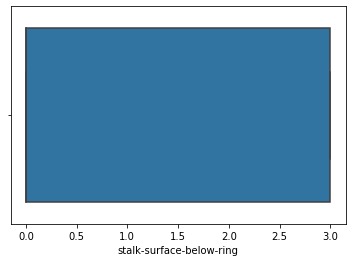

In [19]:
sns.boxplot(df['stalk-surface-below-ring'])

<AxesSubplot:xlabel='ring-type'>

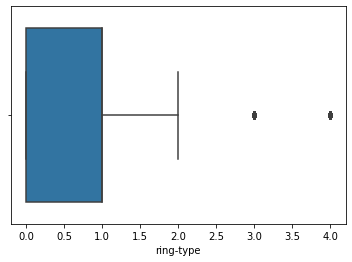

In [20]:
sns.boxplot(df['ring-type'])

<AxesSubplot:xlabel='spore-print-color'>

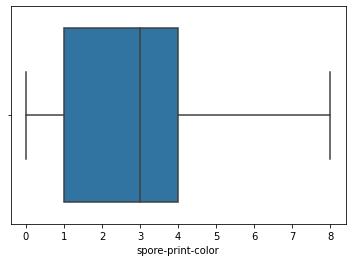

In [21]:
sns.boxplot(df['spore-print-color'])

In [22]:
sm=SMOTE()
x,y=sm.fit_resample(df[['bruises','odor','gill-size','stalk-surface-above-ring','stalk-surface-below-ring','ring-type','spore-print-color']], df[['class']])

In [23]:
y.value_counts()

class
0        4208
1        4208
dtype: int64

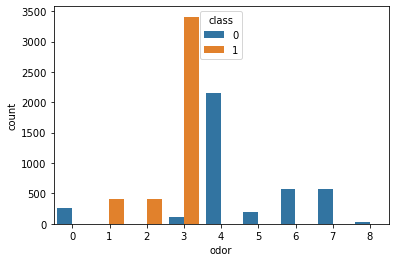

In [24]:
sns.countplot(x="odor",hue="class",data=df)
plt.show()

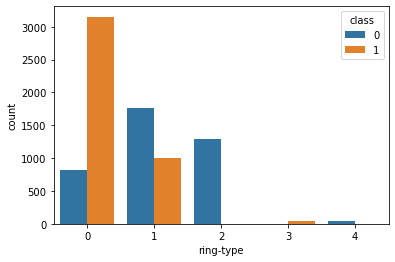

In [25]:
sns.countplot(x="ring-type",hue="class",data=df)
plt.show()

In [26]:
df_clean=df[df['ring-type']<2][df['odor']<5][df['odor']>2]
df_clean.shape

(4344, 23)

In [27]:
from scipy.stats import zscore
df[df.apply(zscore)<=3].shape

(8124, 23)

In [28]:
import scipy.stats as stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3568, 23)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
fx=sc.transform(x)
x=pd.DataFrame(fx,columns=x.columns)
x

,bruises,odor,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color
0,-1.206562,-2.298843,-1.460976,-0.742001,-0.757713,-0.899437,-1.288432
1,-1.206562,-1.663722,0.684474,-0.742001,-0.757713,-0.899437,-0.711991
2,-1.206562,-1.028601,0.684474,-0.742001,-0.757713,-0.899437,-0.711991
3,-1.206562,-2.298843,-1.460976,-0.742001,-0.757713,-0.899437,-1.288432
4,0.828801,-0.393479,0.684474,-0.742001,-0.757713,0.365758,-0.711991
...,...,...,...,...,...,...,...
8411,-1.206562,-2.298843,-1.460976,-0.742001,-0.757713,-0.899437,-1.288432
8412,0.828801,0.241642,-1.460976,-0.742001,-0.757713,0.365758,1.017335
8413,0.828801,1.511885,-1.460976,1.441835,-0.757713,0.365758,1.017335
8414,0.828801,0.241642,0.684474,1.441835,1.475882,1.630953,0.440893


In [30]:
from sklearn.decomposition import PCA
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.725887697940737
3 0.800413785424426
4 0.8641188404550322
5 0.9173797176119459
6 0.9672307298378011
7 0.9999999999999998


In [31]:
pca = PCA(n_components=6) #componenet with Most retention
principalComponents = pca.fit_transform(x)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,SVC]
param={LogisticRegression:(),DecisionTreeClassifier:(),
       KNeighborsClassifier:{"n_neighbors":range(1,30)},
      RandomForestClassifier:{"n_estimators":[10,100,500]},
      SVC:{"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}}

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
best_model_score=0
best_model=0
paramy=0
paramx=0
for model in models:
    if len(param[model])!=0:
        clf = GridSearchCV(model(), param[model], cv=5,scoring="f1")
        clf.fit(principalComponents,y)
        dicty=clf.best_params_
        if len(dicty)==1:
            score=cross_val_score(model(*dicty.values()),principalComponents,y,cv=5,scoring="f1").mean()
            paramx=dicty
        else:
            score=cross_val_score(model(kernel=dicty['kernel'],C=dicty['C']),principalComponents,y,cv=5,scoring="f1").mean()
            paramx=dicty
    else:
        score=cross_val_score(model(),principalComponents,y,cv=5,scoring="f1").mean()
        paramx=0
    if score>best_model_score:
        best_model_score=score
        best_model=model
        paramy=paramx
print('Best model:',best_model)
print('parameters used are:',paramy)
print('F1 score:',best_model_score)

Best model: <class 'sklearn.svm._classes.SVC'>
parameters used are: {'C': 10, 'kernel': 'poly'}
F1 score: 0.9941320293398533


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y,shuffle=True)
        model.fit(x_train,y_train)
        tmp=f1_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    print("random state: ",random," score: ",score)
besttrain(DecisionTreeClassifier(),principalComponents,y)

random state:  0  score:  1.0


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20)
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pred)  

array([[813,   0],
       [  0, 871]], dtype=int64)

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(y_test,y_pred)

1.0

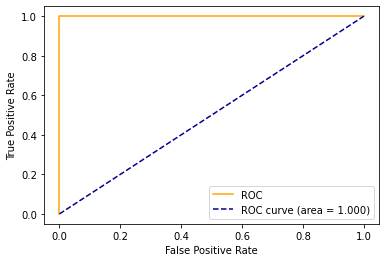

In [38]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [39]:
import joblib
joblib.dump(classifier,'mushroom.obj')

['mushroom.obj']